In [1]:
import utils
from pathlib import Path

base_test_folder = Path('../tests')
output = base_test_folder / "output"


In [2]:
xpdf_path = Path(base_test_folder / "output" / "pdf3").resolve()
# pages = main.get_pages(Path(xpdf_path))
xpdf_path

PosixPath('/home/jtt/repos/PDFigCapX/pdfigcapx/tests/output/pdf3')

In [3]:
from os import listdir
import time

page_names = [
    x for x in listdir(xpdf_path) if x.endswith(".html") and x.startswith("page")
]
t = time.time()
browser = utils.launch_chromedriver()
print(time.time() - t)
print()

html_pages = []
times = []
for idx, page_name in enumerate(page_names):
    t = time.time()
    html_page = utils.extract_page_text_content(
        browser, (xpdf_path / page_name).resolve()
    )
    html_pages.append(html_page)
    times.append(time.time() - t)
    print(idx, time.time() - t)

browser.quit()

# html_pages = sorted(html_pages, key=lambda x: x.page_number)

0.6265919208526611

	 0.021064043045043945
0 0.06572914123535156
	 0.019367218017578125
1 0.04519820213317871
	 0.40831875801086426
2 0.44069409370422363
	 0.0244901180267334
3 0.06385493278503418
	 0.5737183094024658
4 0.657501220703125
	 0.40583348274230957
5 0.4532444477081299
	 0.08780193328857422
6 0.12891268730163574
	 0.9078464508056641
7 0.9476568698883057
	 0.11501598358154297
8 0.14890789985656738
	 0.7357068061828613
9 0.7774209976196289
	 0.951765775680542
10 0.9876377582550049
	 0.8072764873504639
11 0.8514573574066162
	 0.8075973987579346
12 0.8476827144622803
	 0.029084444046020508
13 0.057878971099853516
	 0.029177427291870117
14 0.05765175819396973
	 1.0475385189056396
15 1.0881149768829346
	 0.031681060791015625
16 0.06333112716674805


In [4]:
t_lens = [len(x.text_containers) for x in html_pages]
t_lens

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

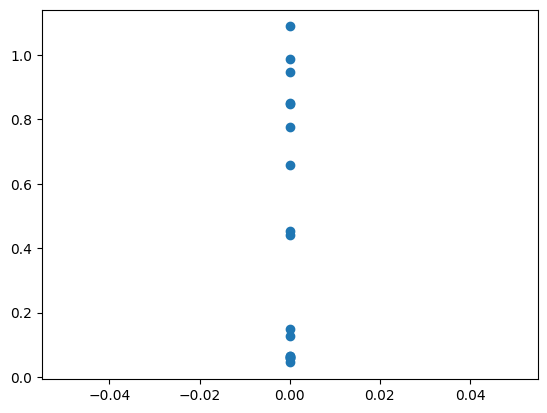

In [5]:
import matplotlib.pyplot as plt

plt.scatter(t_lens, times)